In [96]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [97]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [98]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [99]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [100]:
# INSPECT
inspector_gadget = inspect(engine)

# get all tables
table_names = inspector_gadget.get_table_names()
for table in table_names:
    print(table)
    
    # get columns for table
    for column in inspector_gadget.get_columns(table):
        print(column)
        
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [101]:
# look at "measurement"

query = text("""
                SELECT
                    *
                FROM
                    measurement
                limit 20
            """)

pd.read_sql(query, engine)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [102]:
# look at "station"

query = text("""
                SELECT
                    *
                FROM
                    station
                limit 20
            """)

pd.read_sql(query, engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [103]:
# Find the most recent date in the data set.


In [104]:
# find most recent measurement dates

query = text("""
                SELECT
                    date,
                    count(*) as num_rows
                FROM
                    measurement
                group by
                    date
                order by
                    date desc
                limit 10
            """)

pd.read_sql(query, engine)

,date,num_rows
0,2017-08-23,4
1,2017-08-22,3
2,2017-08-21,4
3,2017-08-20,3
4,2017-08-19,4
5,2017-08-18,4
6,2017-08-17,4
7,2017-08-16,4
8,2017-08-15,5
9,2017-08-14,5


In [105]:
# most recent date is 2017-08-23
# most recent year is back to 2016-08-23

query = text("""
                SELECT
                    date,
                    station,
                    prcp
                FROM
                    measurement
                WHERE
                    date > '2016-08-22';
            """)

df = pd.read_sql(query, engine)

# most current year readings
df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00


In [106]:
df.station.value_counts()

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: station, dtype: int64

In [107]:
df.date.value_counts()

2016-08-23    7
2017-02-16    7
2017-01-31    7
2017-02-01    7
2017-02-02    7
             ..
2017-08-09    3
2017-08-22    3
2017-08-05    3
2017-08-12    3
2017-08-20    3
Name: date, Length: 366, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     2230 non-null   object 
 1   station  2230 non-null   object 
 2   prcp     2021 non-null   float64
dtypes: float64(1), object(2)
memory usage: 52.4+ KB


In [109]:
df["date"] = pd.to_datetime(df["date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2230 non-null   datetime64[ns]
 1   station  2230 non-null   object        
 2   prcp     2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 52.4+ KB


In [110]:
df.sort_values(by = "date", ascending = True)

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1009,2016-08-23,USC00517948,NaN
1529,2016-08-23,USC00519281,1.79
704,2016-08-23,USC00514830,0.05
361,2016-08-23,USC00513117,0.15
...,...,...,...
1527,2017-08-22,USC00519523,0.00
1008,2017-08-23,USC00514830,0.00
360,2017-08-23,USC00519397,0.00
1528,2017-08-23,USC00519523,0.08


In [111]:
df1 = df.dropna().sort_values(by = "date", ascending = True).reset_index(drop = True)
df1.head(20)

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00519523,0.02
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00516128,0.70
4,2016-08-23,USC00513117,0.15
5,2016-08-23,USC00519281,1.79
6,2016-08-24,USC00519523,1.22
7,2016-08-24,USC00519397,0.08
8,2016-08-24,USC00519281,2.15
9,2016-08-24,USC00513117,2.15


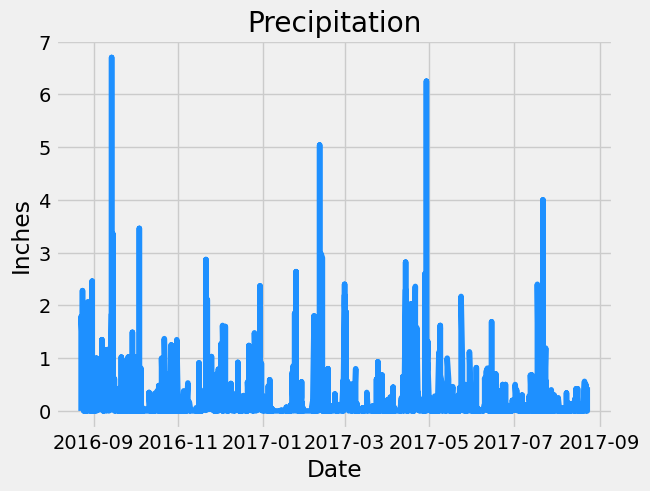

In [112]:
plt.plot(df1.date, df1.prcp, color = "dodgerblue")
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [113]:
df1.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [114]:
df.groupby("station").prcp.describe()

,count,mean,std,min,25%,50%,75%,max
station,,,,,,,,
USC00513117,343.0,0.141429,0.341245,0.0,0.00,0.03,0.120,2.90
USC00514830,265.0,0.125434,0.316290,0.0,0.00,0.02,0.120,2.39
USC00516128,328.0,0.450640,0.717174,0.0,0.01,0.19,0.610,6.70
USC00517948,60.0,0.076500,0.317857,0.0,0.00,0.00,0.025,2.40
USC00519281,352.0,0.198949,0.419182,0.0,0.00,0.06,0.190,2.98
USC00519397,359.0,0.044819,0.188810,0.0,0.00,0.00,0.020,2.62
USC00519523,314.0,0.121051,0.509002,0.0,0.00,0.00,0.060,6.25


In [115]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [116]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [117]:
# Design a query to calculate the total number of stations in the dataset
query = text("""
                SELECT
                    COUNT(DISTINCT station) as Total_Stations
                FROM
                    station
            """)

pd.read_sql(query, engine)

,Total_Stations
0,9


In [118]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text("""
                SELECT
                    station,
                    count(*) as total_observations
                FROM
                    measurement
                GROUP BY
                    station
                ORDER BY
                    total_observations desc
                LIMIT 10
            """)

pd.read_sql(query, engine)

,station,total_observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [119]:
# for PRECIPITATION

query = text("""
                SELECT
                    station,
                    min(prcp),
                    max(prcp),
                    avg(prcp)
                FROM
                    measurement
                WHERE
                    station = "USC00519281"
            """)

pd.read_sql(query, engine)

,station,min(prcp),max(prcp),avg(prcp)
0,USC00519281,0.0,9.64,0.212352


In [120]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


query = text("""
                SELECT
                    station,
                    min(tobs),
                    max(tobs),
                    avg(tobs)
                FROM
                    measurement
                WHERE
                    station = "USC00519281"
            """)

pd.read_sql(query, engine)

,station,min(tobs),max(tobs),avg(tobs)
0,USC00519281,54.0,85.0,71.663781


In [121]:
query = text("""
                SELECT
                    date,
                    tobs,
                    station
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23'
                    and station = 'USC00519281'
            """)

df = pd.read_sql(query, engine)
df.head()

,date,tobs,station
0,2016-08-23,77.0,USC00519281
1,2016-08-24,77.0,USC00519281
2,2016-08-25,80.0,USC00519281
3,2016-08-26,80.0,USC00519281
4,2016-08-27,75.0,USC00519281


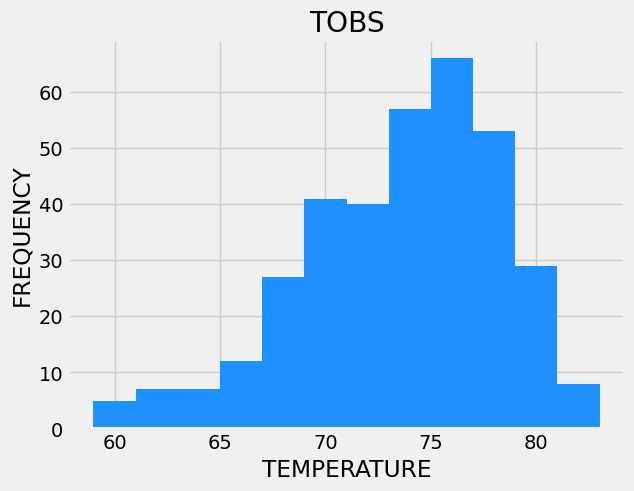

In [122]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.hist(df.tobs, bins=12, color = "dodgerblue")
plt.title("TOBS")
plt.xlabel("TEMPERATURE")
plt.ylabel("FREQUENCY")
plt.show()


# Close Session

In [123]:
# Close Session
Session.close()

TypeError: close() missing 1 required positional argument: 'self'